# Pymaceuticals Inc.
---

### Analysis

- Capomulin has been shown to consistently reduce tumors in mice.
- Ketapril, Naftisol, and Stelasyn were all less effective than Placebo in reducing tumors.
- Tumor size is proportional to mouse weight.

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [43]:
# Checking the number of mice.
data_df["Mouse ID"].nunique()

249

In [104]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df[data_df.duplicated(['Mouse ID','Timepoint'])].sort_values('Mouse ID')
duplicate_mice['Mouse ID'].unique()

array(['g989'], dtype=object)

In [112]:
# Optional: Get all the data for the duplicate mouse ID. 
exclude = data_df.loc[data_df['Mouse ID'].isin(duplicate_mice['Mouse ID'])]#
exclude

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data_df = data_df.drop(exclude.index)
clean_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [128]:
# Checking the number of mice in the clean DataFrame.
clean_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [173]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:

clean_data_grouped = clean_data_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_vol = clean_data_grouped["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_data_grouped["Tumor Volume (mm3)"].median()
std_tumor_vol = clean_data_grouped["Tumor Volume (mm3)"].agg(np.std, ddof=1)
var_tumor_vol = clean_data_grouped["Tumor Volume (mm3)"].agg(np.var, ddof=1)
sem_tumor_vol = clean_data_grouped["Tumor Volume (mm3)"].agg(st.sem, ddof=1)

# Assemble the resulting series into a single summary DataFrame.
summstats_df = pd.concat([mean_tumor_vol, median_tumor_vol, var_tumor_vol, std_tumor_vol, sem_tumor_vol], axis=1)

summstats_df.columns = ["Mean Tumor Volume","Median Tumor Volume","Tumor Volume Variance","Tumor Volume Std. Dev.","Tumor Volume Std. Err."]
summstats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [190]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

adv_summary_df = clean_data_grouped["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', st.sem,])
adv_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, '# of observed Timepoints')

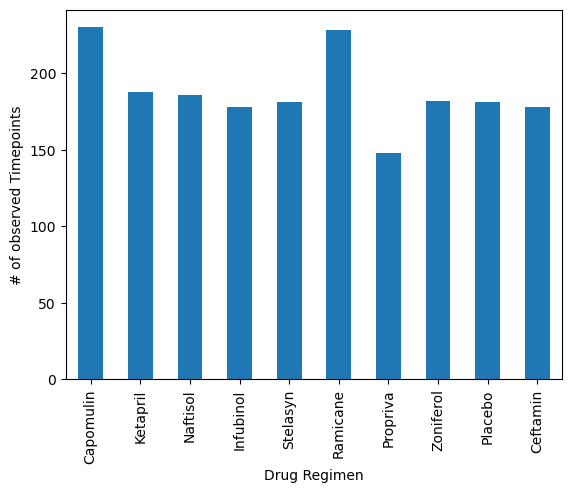

In [232]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
labels = data_df["Drug Regimen"].unique()
y_axis = clean_data_grouped["Drug Regimen"].value_counts()
df = pd.DataFrame({'# of observed Timepoints': y_axis}, index=labels)
ax = df['# of observed Timepoints'].plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Timepoints")

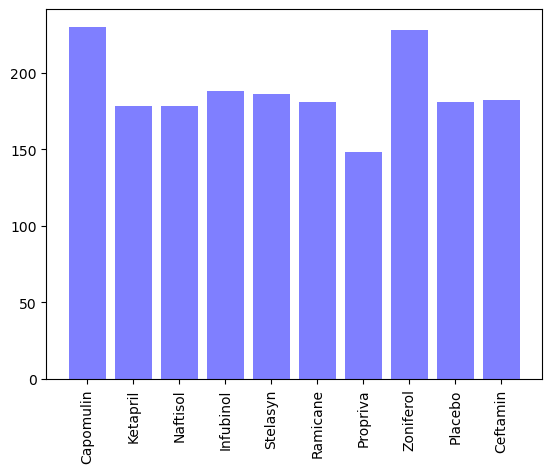

In [228]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(summstats_df))
tick_locations = [value+0.4 for value in x_axis]
plt.bar(x_axis, clean_data_grouped["Drug Regimen"].value_counts(), color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, labels, rotation="vertical")
plt.show()

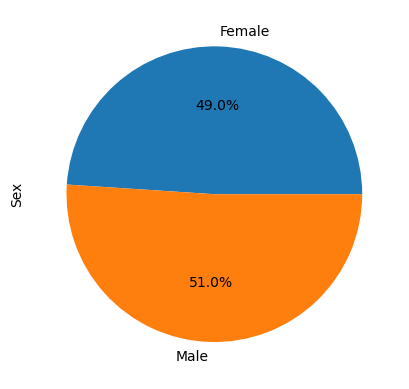

In [263]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Cleaned Data counts the same mice multiple times at different time points. Creating new DataFrame to represent individual mice
unique_mice = clean_data_df[clean_data_df.duplicated(['Mouse ID'])].sort_values('Mouse ID')

data_grouped_bysex = unique_mice.groupby(["Sex"])
labels_bysex = unique_mice["Sex"].unique()
bysex = data_grouped_bysex["Sex"].value_counts()
df_bysex = pd.DataFrame({'Sex': bysex}, index=labels_bysex)
plot_bysex = df_bysex['Sex'].plot(kind="pie", autopct='%.1f%%')

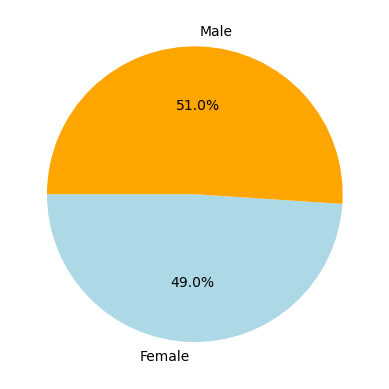

In [264]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colours = ["lightblue", "orange"]
plt.pie(bysex, labels=labels_bysex, colors=colours ,autopct="%1.1f%%", startangle=180)
plt.show()

## Quartiles, Outliers and Boxplots

In [327]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Put treatments into a list for for loop (and later for plot labels)
search = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
mice_df = clean_data_df.groupby(["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse

greatest_vol = mice_df["Tumor Volume (mm3)"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_df = pd.merge(clean_data_df, greatest_vol, how="left", on=["Mouse ID", "Mouse ID"])
new_df = new_df.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume (mm3)","Tumor Volume (mm3)_y":"Final Tumor Volume (mm3)"})
new_df = new_df[new_df['Drug Regimen'].isin(search)]
new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Tumor Volume (mm3)
0,b128,0,45.000000,0,Capomulin,Female,9,22,45.651331
29,c326,0,45.000000,0,Infubinol,Female,18,25,45.000000
30,c139,0,45.000000,0,Infubinol,Male,11,28,72.226731
31,v339,0,45.000000,0,Infubinol,Male,20,26,46.250112
32,a577,0,45.000000,0,Infubinol,Female,6,25,57.031862
...,...,...,...,...,...,...,...,...,...
1866,a644,45,32.978522,1,Ramicane,Female,7,17,46.910892
1872,i177,45,33.562402,3,Ramicane,Male,10,18,45.000000
1875,r944,45,41.581521,2,Capomulin,Male,12,25,47.373423
1876,u364,45,31.023923,3,Capomulin,Male,18,17,47.212200


In [379]:
# Create empty list to fill with tumor vol data (for plotting)

tumor = []

final_vol_data = pd.DataFrame(greatest_vol)

mice_full = pd.merge(clean_data_df, greatest_vol, how="left", on=["Mouse ID", "Mouse ID"])

mice_full.sort_values("Tumor Volume (mm3)_y")

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for item in search:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    checkitem = mice_full[mice_full['Drug Regimen'] == item]

    quartiles = checkitem["Tumor Volume (mm3)_y"].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # add subset 
    outlierlow = lowerq-(1.5*iqr)
    outlierhigh = upperq + (1.5*iqr)

    tumor.append(lowerq)
    tumor.append(upperq)
    tumor.append(iqr)
    tumor.append(outlierlow)
    tumor.append(outlierhigh)

    # Determine outliers using upper and lower bounds
    print("Upper bound for " + str(item) + " is " + str(outlierhigh))
    print("Highest value for " + str(item) + " is " + str(mice_full["Tumor Volume (mm3)_y"].max()))
    print("Lower bound for " + str(item) + " is "+str(outlierlow))
    print("lowest value for " + str(item) + " is " + str(mice_full["Tumor Volume (mm3)_y"].min()))

print(tumor)

Upper bound for Capomulin is 49.345404342500004
Highest value for Capomulin is 78.56701362
Lower bound for Capomulin is 42.582258602500005
lowest value for Capomulin is 45.0
Upper bound for Ramicane is 48.359580925
Highest value for Ramicane is 78.56701362
Lower bound for Ramicane is 42.984251445
lowest value for Ramicane is 45.0
Upper bound for Infubinol is 79.94448597000002
Highest value for Infubinol is 78.56701362
Lower bound for Infubinol is 43.28428740999999
lowest value for Infubinol is 45.0
Upper bound for Ceftamin is 72.21174041500001
Highest value for Ceftamin is 78.56701362
Lower bound for Ceftamin is 52.25999677499999
lowest value for Ceftamin is 45.0
[45.118438255, 46.80922469, 1.6907864349999997, 42.582258602500005, 49.345404342500004, 45.0, 46.34383237, 1.3438323700000012, 42.984251445, 48.359580925, 57.03186187, 66.19691151, 9.165049640000007, 43.28428740999999, 79.94448597000002, 59.74190064, 64.72983655, 4.9879359100000045, 52.25999677499999, 72.21174041500001]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

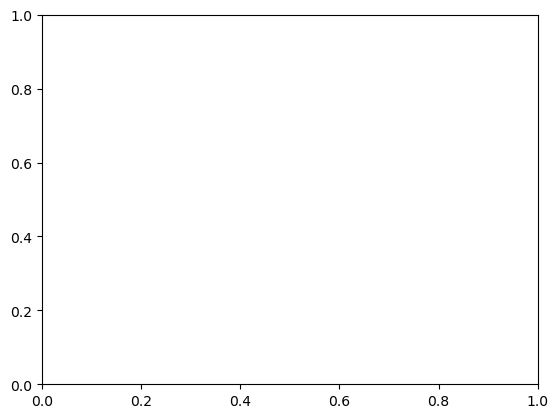

In [369]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
mice_grouped = mice_full.groupby(["Drug Regimen"])
mice_grouped_tumvol = mice_grouped['Tumor Volume (mm3)_y']

## Line and Scatter Plots

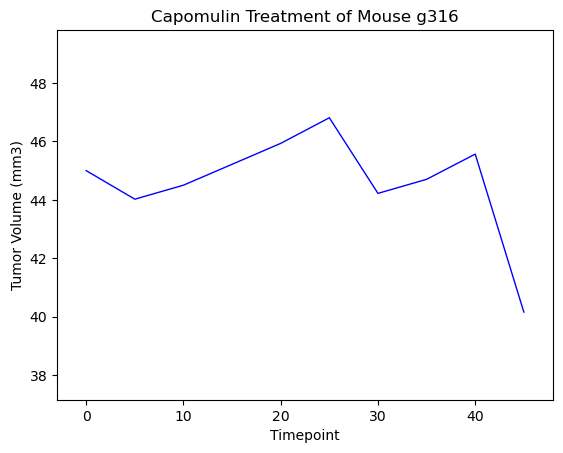

In [491]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capitem = clean_data_df[clean_data_df['Drug Regimen'] == 'Capomulin']
mousesample = capitem.sample(1)
mouseid = mousesample.loc[mousesample.index,'Mouse ID'].iat[0]
sample = clean_data_df[clean_data_df['Mouse ID'] == mouseid]

x_axis = sample['Timepoint']
y_axis = sample["Tumor Volume (mm3)"]

x_lim = sample['Timepoint'].max()
y_min = sample["Tumor Volume (mm3)"].min()
y_max = sample["Tumor Volume (mm3)"].max()

plt.title("Capomulin Treatment of Mouse " + mouseid)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.xlim(-3, (x_lim + 3))
plt.ylim((y_min - 3), (y_max + 3))

plt.plot(x_axis, y_axis, color="blue", linewidth=1)
plt.show()

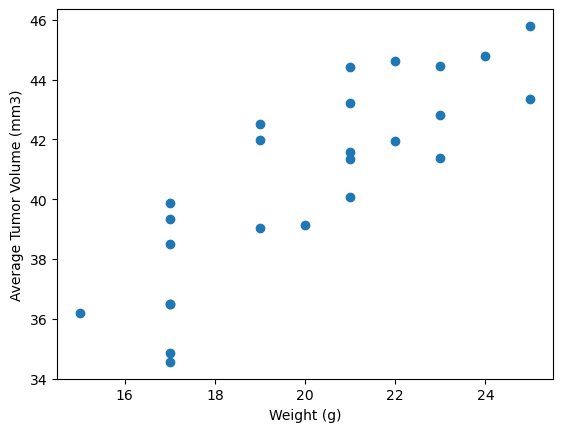

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


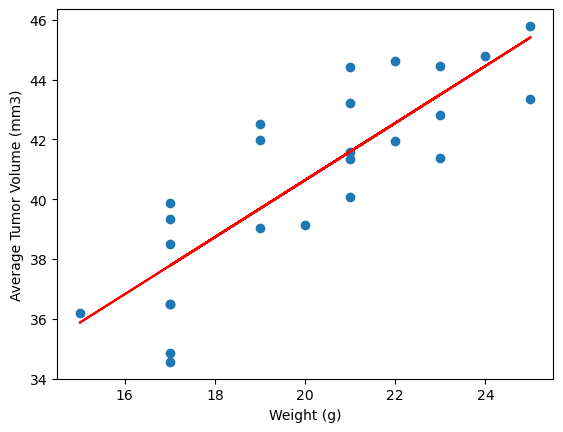

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
